In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [28]:
!pip install tensorflow

In [29]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [30]:
print(train_images.shape)

(50000, 32, 32, 3)


In [31]:
def display_dataset_info(images, labels, class_names):
    print("Dataset Information:")
    print(f"Number of samples: {images.shape[0]}")
    print(f"Image shape: {images.shape[1:]}")
    print(f"Number of classes: {len(class_names)}")
    print(f"Class names: {class_names}")

    # Display the first few images with their labels
    plt.figure(figsize=(10, 10))
    num_images = 9
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
    plt.show()


Training dataset:
Dataset Information:
Number of samples: 50000
Image shape: (32, 32, 3)
Number of classes: 10
Class names: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


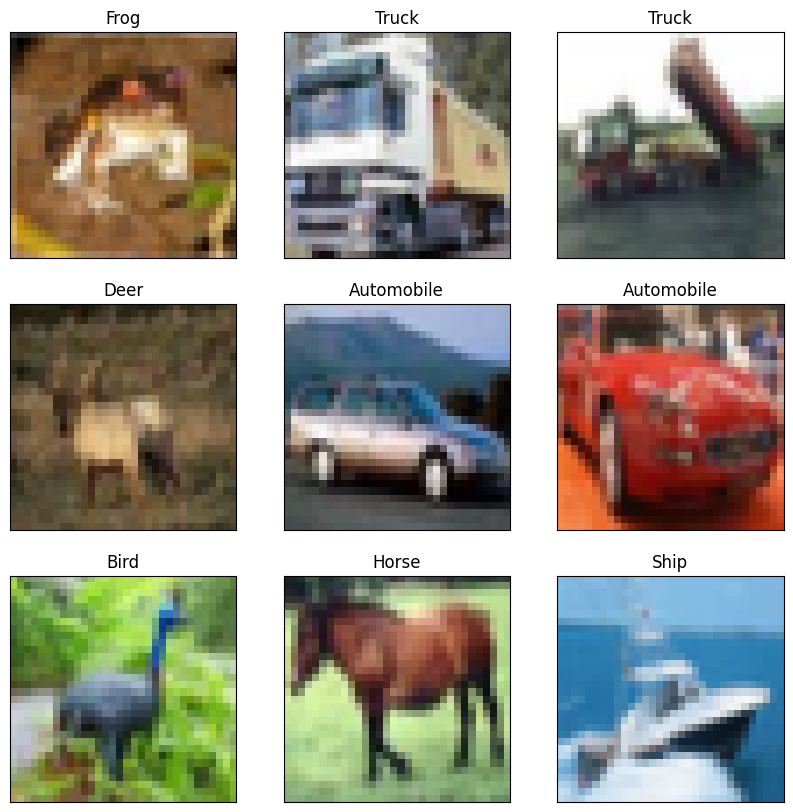

Test dataset:
Dataset Information:
Number of samples: 10000
Image shape: (32, 32, 3)
Number of classes: 10
Class names: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


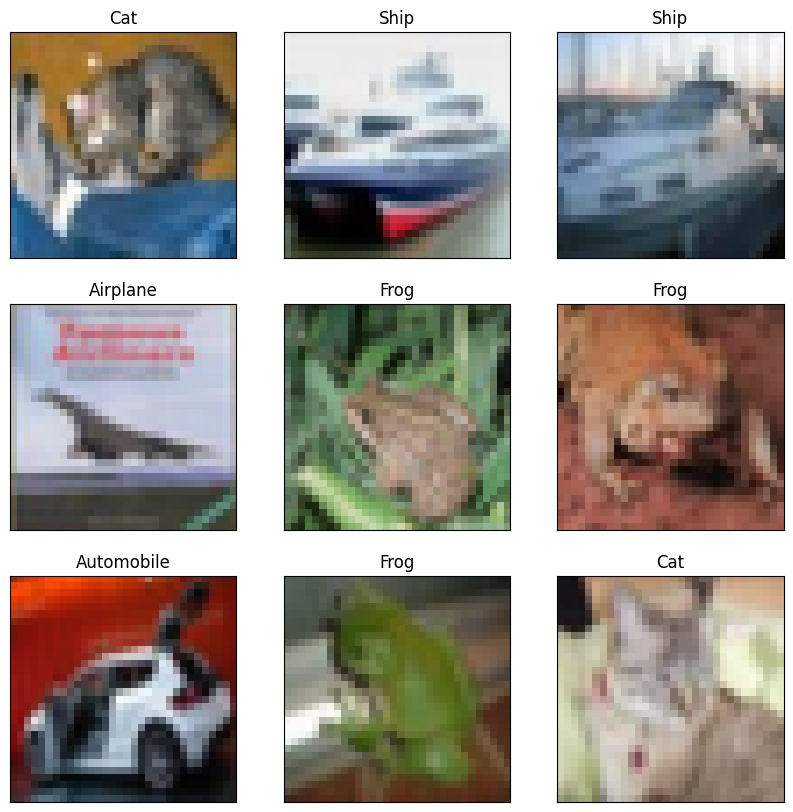

In [32]:

print("Training dataset:")
display_dataset_info(train_images, train_labels, class_names)

# Display information about the test dataset
print("Test dataset:")
display_dataset_info(test_images, test_labels, class_names)

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3504 - loss: 1.7689 - val_accuracy: 0.5510 - val_loss: 1.2549
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5675 - loss: 1.2130 - val_accuracy: 0.6140 - val_loss: 1.0879
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6334 - loss: 1.0400 - val_accuracy: 0.6440 - val_loss: 1.0053
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6757 - loss: 0.9288 - val_accuracy: 0.6708 - val_loss: 0.9505
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7039 - loss: 0.8415 - val_accuracy: 0.6869 - val_loss: 0.8935
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7320 - loss: 0.7766 - val_accuracy: 0.6840 - val_loss: 0.9224
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7470 - loss: 0.7364 - val_accuracy: 0.7014 - val_loss: 0.8782
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7602 -

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 3s - 10ms/step - accuracy: 0.6989 - loss: 0.8962

Test accuracy: 0.6988999843597412


In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

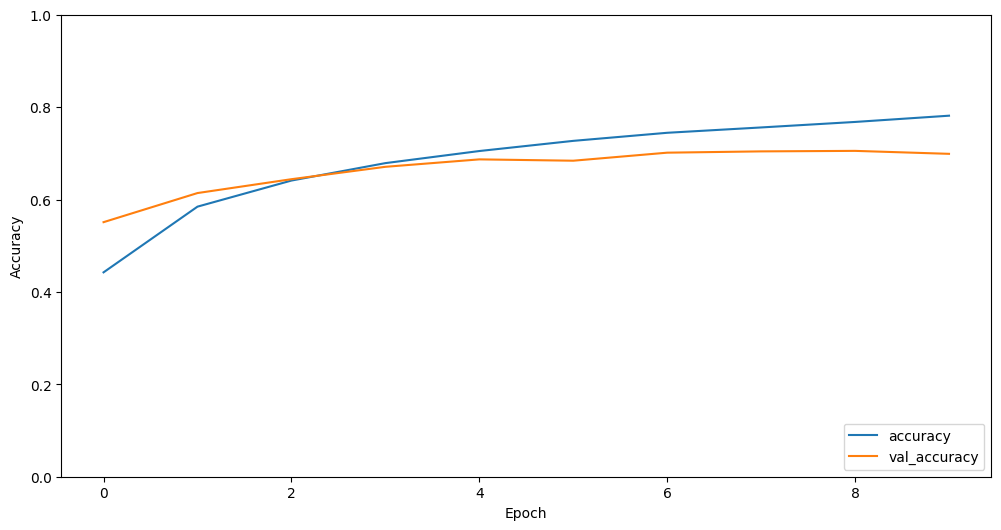

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


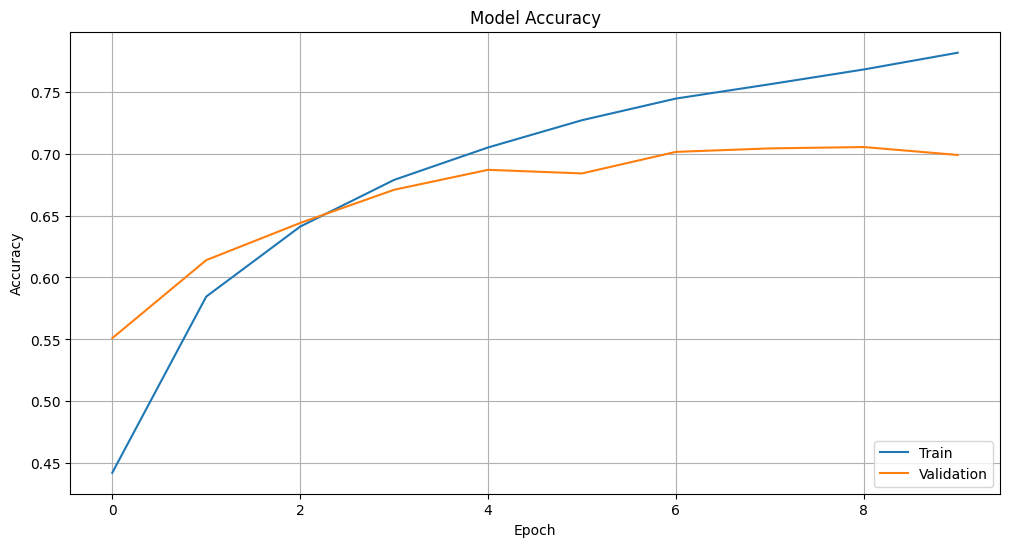

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True)
plt.show()


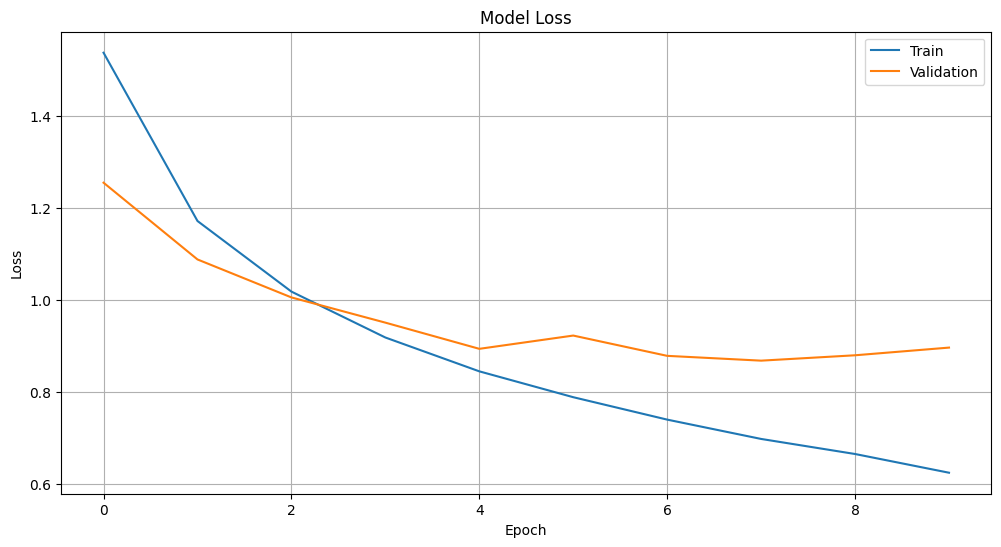

In [46]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


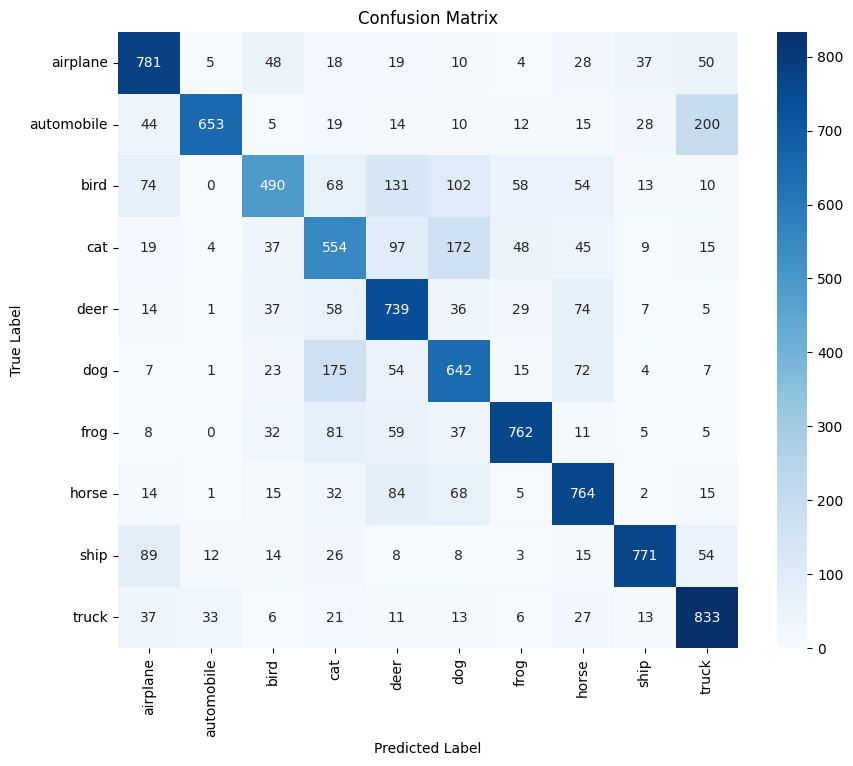

In [67]:
from sklearn.metrics import confusion_matrix

# Predict labels for the test set
test_predictions = model.predict(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)

# Ensure test_labels is a 1D array
test_labels = test_labels.flatten()

cm = confusion_matrix(test_labels, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [48]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(test_labels, predicted_labels, target_names=class_names))


              precision    recall  f1-score   support

    Airplane       0.72      0.78      0.75      1000
  Automobile       0.92      0.65      0.76      1000
        Bird       0.69      0.49      0.57      1000
         Cat       0.53      0.55      0.54      1000
        Deer       0.61      0.74      0.67      1000
         Dog       0.58      0.64      0.61      1000
        Frog       0.81      0.76      0.78      1000
       Horse       0.69      0.76      0.73      1000
        Ship       0.87      0.77      0.82      1000
       Truck       0.70      0.83      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


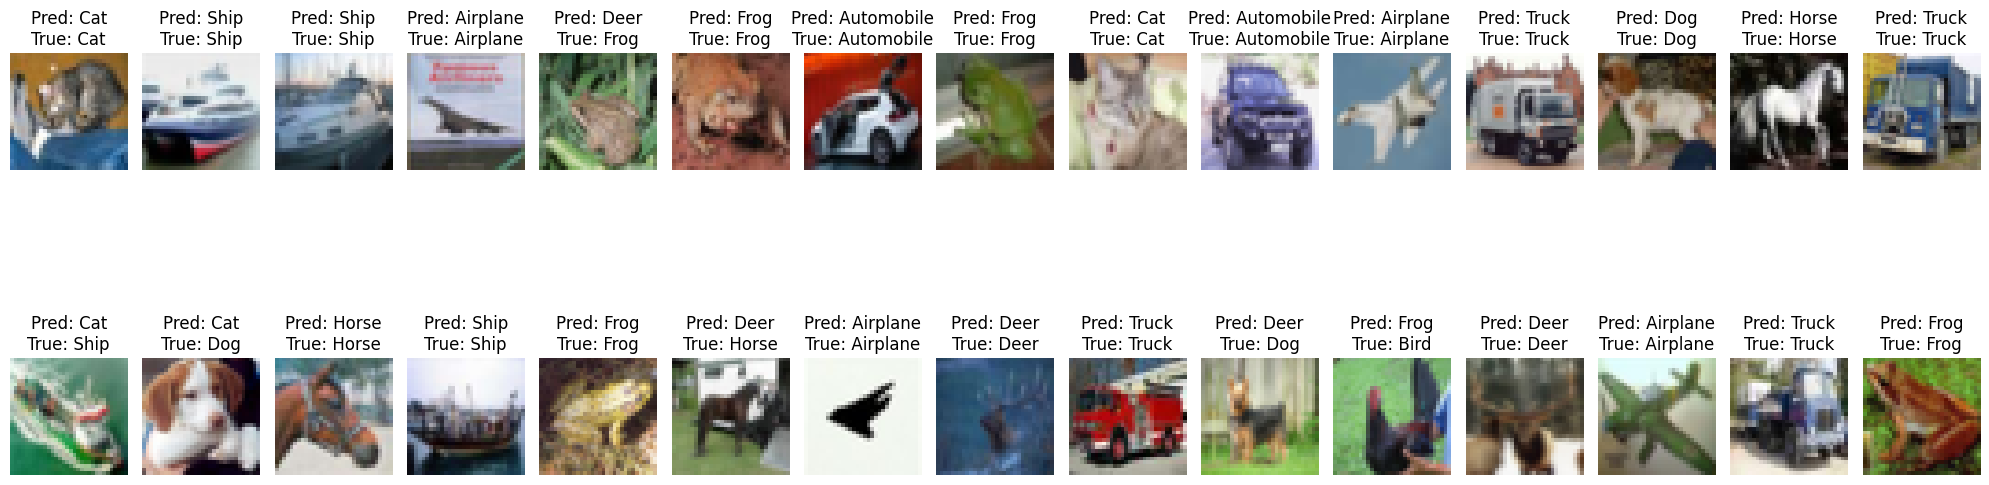

In [61]:
# Predict labels for the test set
test_predictions = model.predict(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)

# Ensure test_labels is a 1D array
test_labels = test_labels.flatten()

# Plot some test images with predicted labels
plt.figure(figsize=(20, 10))
for i in range(30):
    plt.subplot(3, 15, i + 1)  # Adjust the number of rows and columns
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}",
              fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [62]:
print(predicted_labels.shape)  # Should be (num_test_samples,)
print(test_labels.shape)       # Should be (num_test_samples,)


(10000,)
(10000,)


In [63]:
print("Sample predictions:", predicted_labels[:30])
print("Sample true labels:", test_labels[:30])


Sample predictions: [3 8 8 0 4 6 1 6 3 1 0 9 5 7 9 3 3 7 8 6 4 0 4 9 4 6 4 0 9 6]
Sample true labels: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6]
